<a href="https://colab.research.google.com/github/ROGUE-PROGRAMMER/podcast-test/blob/main/netflixproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
df = pd.read_csv('netflix_titles.csv')
print(df)
df = pd.read_csv('netflix_titles.csv')
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [3]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown Cast', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df['date_added'].fillna('Not Available', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Not Available', inplace=True)
missing_values_cleaned = df.isnull().sum()
print("Missing values after cleaning:\n", missing_values_cleaned)

Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-3-b346acab9e6d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-3-b346acab9e6d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

<ipython-input-4-68d737e59f7f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


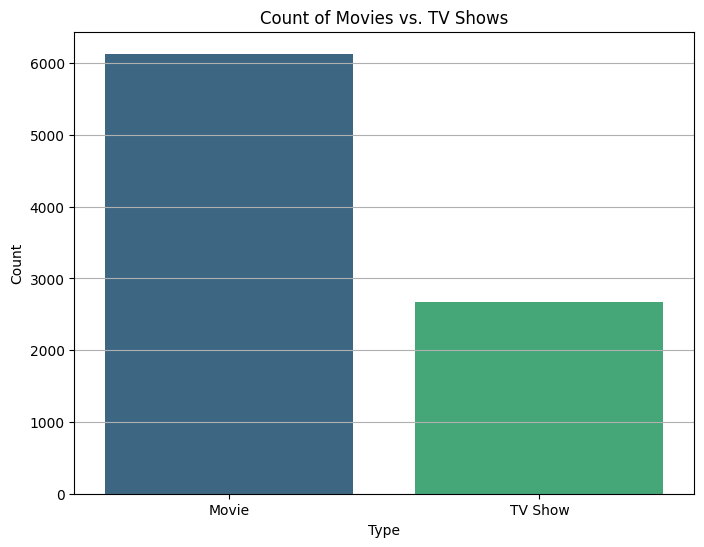

<ipython-input-4-68d737e59f7f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


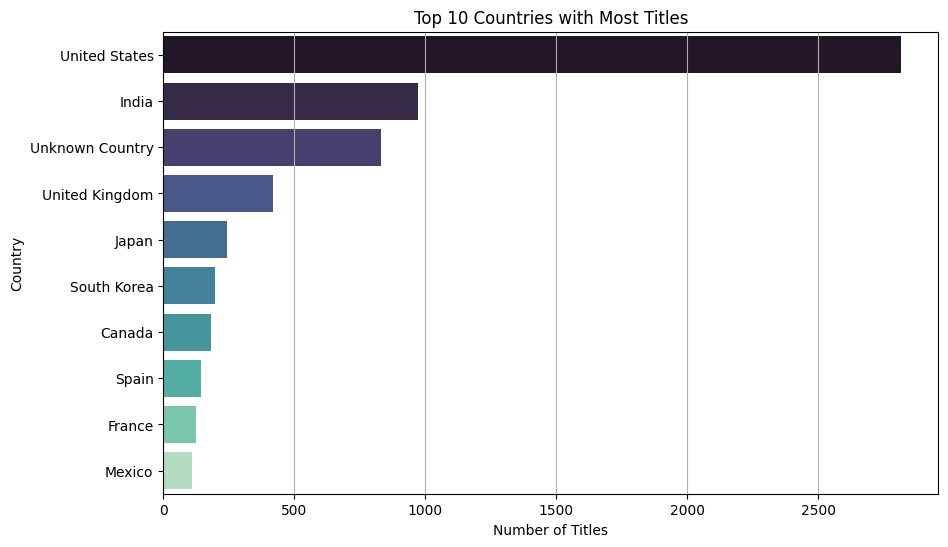

<ipython-input-4-68d737e59f7f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


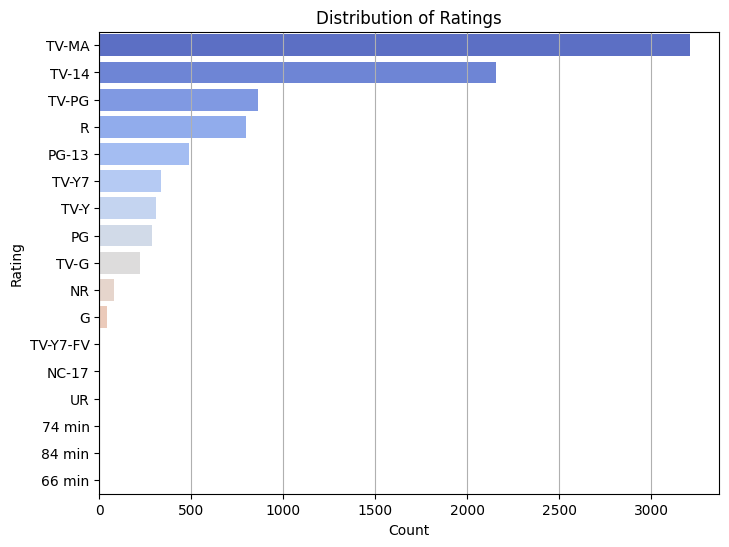

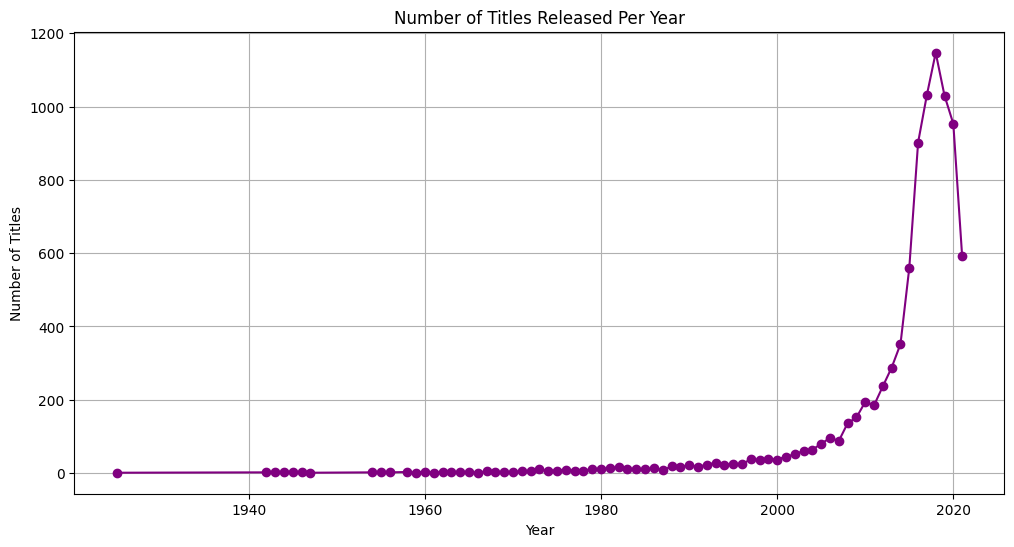

<ipython-input-4-68d737e59f7f>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='flare')


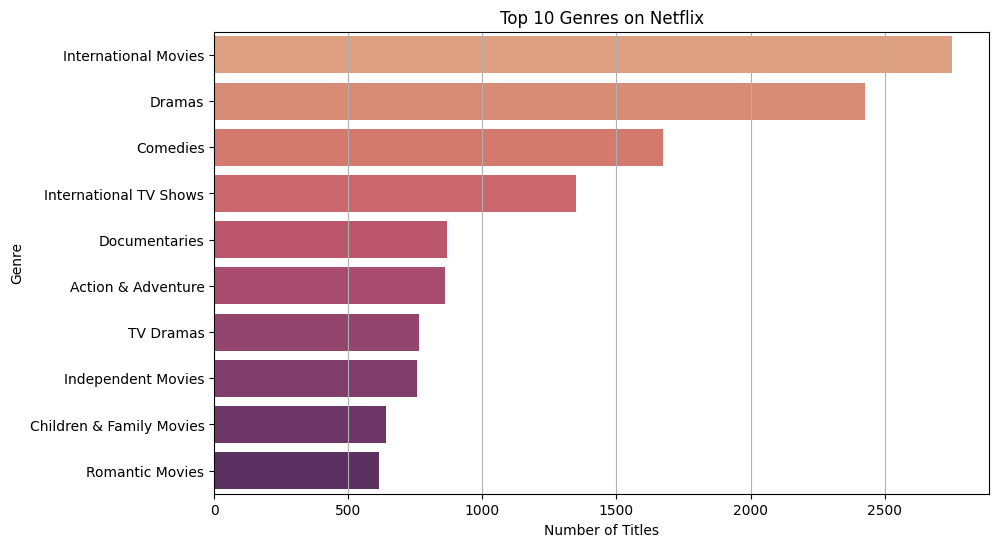

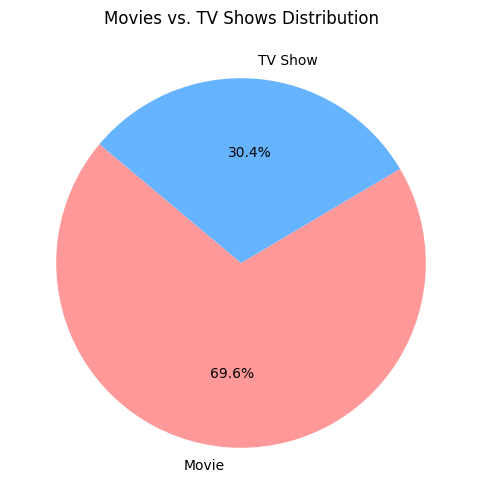

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Count of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 6))
df['release_year'] = df['release_year'].astype(int)
titles_per_year = df['release_year'].value_counts().sort_index()
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='purple')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='flare')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()

type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Movies vs. TV Shows Distribution')
plt.show()
